In [ ]:
from base_m_noise import *
import base_m_noise; importlib.reload(base_m_noise)

from fplanck import *
import fplanck; importlib.reload(fplanck)

from b_lam_dis import *
import b_lam_dis; importlib.reload(b_lam_dis)

' Please try to remember to save simulations '

Text(0, 0.5, 'Div. point')

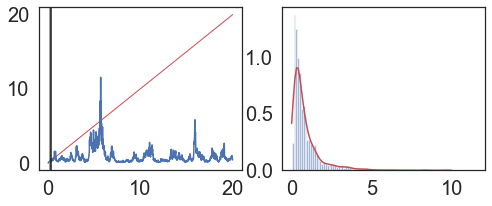

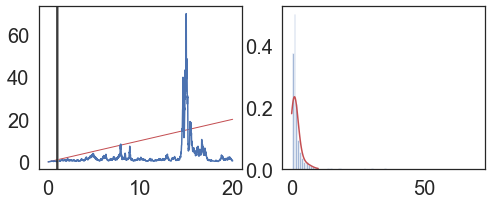

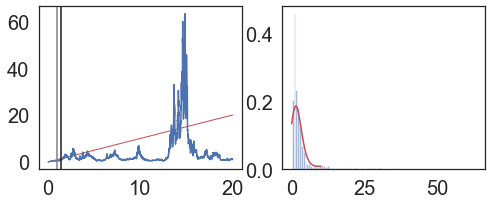

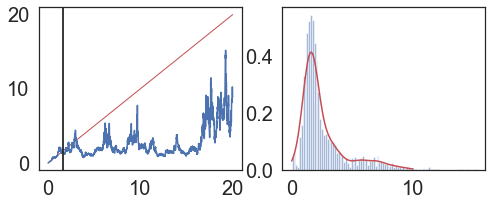

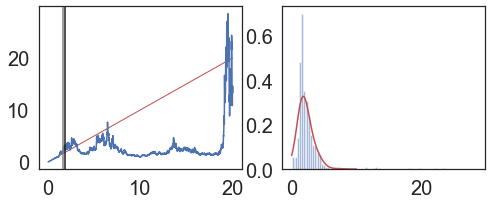

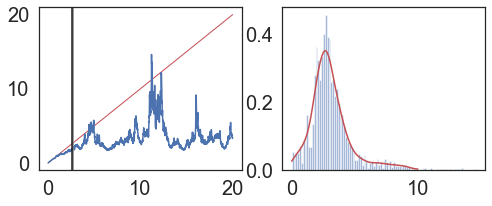

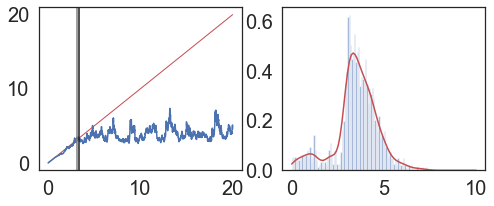

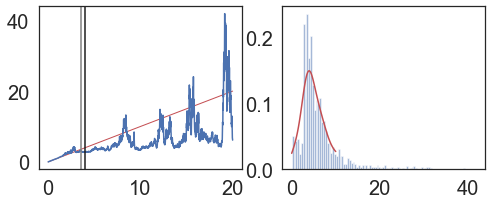

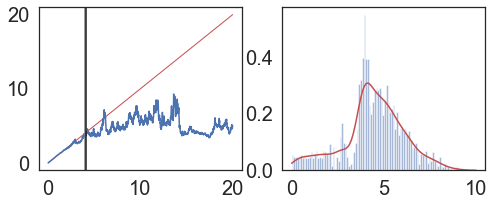

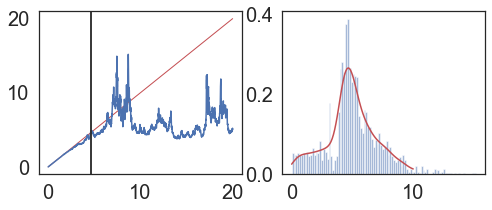

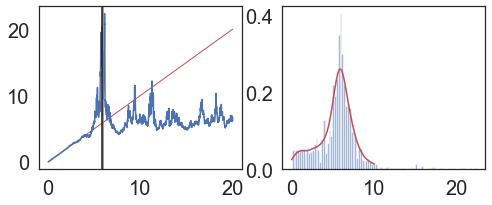

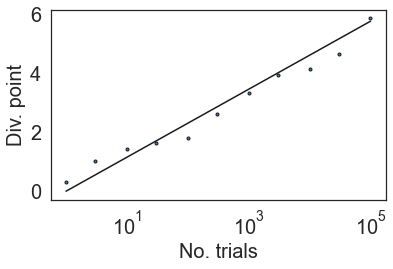

In [ ]:
om = 1

trial = [1, 3, 10, 30, 100, 300, 1000, 3000, 10000, 
          30000, 100000] # 300000, 1000000, 3000000
div_po = []

for tr in trial:
    tlist, ml2, p, fwhm = FPE_ev(om, 2, 0, 20, f_, g_lin, dt=0.001, xinit=0, ntrials=tr)
    an = [om*t for t in tlist]

    fig, (ax, ax2) = plt.subplots(1, 2, figsize=(8, 3)) 
    ax.plot(tlist, an, 'r', linewidth=1) 
    ax.plot(tlist, ml2) 

    kernel = gaussian_kde(ml2) 
    x_pts = np.linspace(0,10,100) 
    est_pdf = kernel.evaluate(x_pts) 
    ax2.plot(x_pts, est_pdf, color="r")
    mean = x_pts[np.argmax(kernel(x_pts))] 

    n, bins, patches = ax2.hist(ml2, density=True, bins=100, color='b', alpha=0.5, label='Data') 
    mode_index = n.argmax()
    mode = (bins[mode_index] + bins[mode_index+1])/2

    div_po.append(mean)
    ax.axvline(mode, color='grey')
    ax.axvline(mean, color='k')

fig, ax = plt.subplots(1, 1, figsize=(6, 3.5))

l3 = [0.5*np.log(x) for x in trial]  
ax.plot(trial, l3, 'k-')
ax.plot(trial, div_po, 'bo', markersize=3, mec = 'k')
ax.set_xlabel("No. trials")
ax.set_xscale('log')
ax.set_ylabel(r"Div. point")

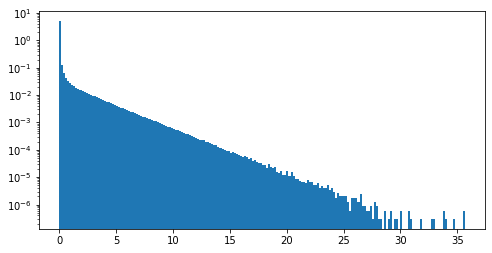

In [22]:
lam = burst_hist(1, 2, 1, 5000000, f_, g_lin, dt=0.001, height=np.pi)

y = lam[1:] 

f, ax = plt.subplots(1, 1, figsize=(8, 4))
n, bins, patches = ax.hist(y, density=True, bins=200) 
ax.set_yscale('log')

In [ ]:
data = pd.DataFrame({'lam': lam})

s = '/'
data.to_csv(s+'burst_om1_Dm2_Da0_thr0p785_lin_.csv', sep='\t')

In [ ]:
s = '/'
av_dat = pd.read_csv(s+'burst_om1_Dm2_Da0_thr0p785_lin.csv', sep='\t', index_col=0)

2.009895017588334
1.9821642746659998


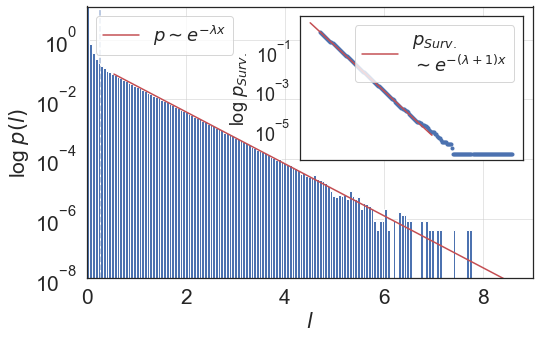

In [ ]:
s = '/'
data = pd.read_csv(s+'burst_om1_Dm2_Da0_thr0p785_lin.csv', sep='\t', index_col=0)

s = 21
params = {'xtick.labelsize': s, 'ytick.labelsize': s, 'legend.fontsize': s-1.5,
              'axes.labelsize': s, 'font.size': s, 'legend.handlelength': 2}

sns.set_theme(style="white", rc=params)

y = np.array(data['lam'])

f, ax = plt.subplots(1, 1, figsize=(8, 5))
n, bins, patches = ax.hist(y, density=True, bins=200) 

def exp_func(x,a,b): 
    return(a*np.exp(-b*x)) 

x_, n_ = bins[10:], n[9:] 
popt, pcov = scipy.optimize.curve_fit(exp_func, x_, n_) 
print(popt[1])
ax.plot(x_, exp_func(x_, *popt), 'r', label=r'$p \sim e^{-\lambda x}$')  # e^{-1.3x}

ax.set_yscale('log') 
ax.axvline(0.28, linestyle='--', alpha=0.5) 
ax.set_xlim([0,9]) 
ax.set_ylim([10e-9,13]) 
ax.grid(alpha=0.5)

ax.set_ylabel(r'log $p(l)$')
ax.set_xlabel(r'$l$')
ax.legend(loc='upper left', fontsize=18)

from mpl_toolkits.axes_grid.inset_locator import inset_axes

ins_ax = inset_axes(ax, 
                    width="50%",
                    height=2, 
                    loc=1)

y_cum = np.cumsum(n_)/np.max(np.cumsum(n_))

y_surv = 1-y_cum
#x = bins[1:]

ins_ax.plot(x_, y_surv, '.')

popt, pcov = scipy.optimize.curve_fit(exp_surv, x_, y_surv) 
print(popt[1])
ins_ax.plot(bins[:-80], exp_surv(bins[:-80], *popt), 'r', label=r'$p_{Surv.}$ '+'\n'+r'$\sim e^{-(\lambda+1) x}$') # e^{-1.98 x}

ins_ax.set_ylabel(r'log $p_{Surv.}$', fontsize=18)
ins_ax.set_yscale('log')
ins_ax.legend(fontsize=18)
ins_ax.xaxis.set_tick_params(labelsize=18)
ins_ax.yaxis.set_tick_params(labelsize=18)
ins_ax.set_xticklabels([])

f.savefig('surv_prob3.png', format='png', dpi=180, bbox_inches="tight")